In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from scipy import signal
import seaborn as sns

In [3]:
import scipy 

def bandpower(x, fs, fmin, fmax):
    f, Pxx = scipy.signal.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

In [4]:
def run_violinrun(file):
    df = pd.read_csv(file, index_col=0)
    df = df.drop(columns=['Right AUX'])
    data = df.to_numpy()

    plot_data = []
    for i in range(4):
        delta = bandpower(data[:, i], 256, 1, 4)
        theta = bandpower(data[:, i], 256, 4, 8)
        alpha = bandpower(data[:, i], 256, 7.5, 13)
        beta = bandpower(data[:, i], 256, 13, 30)
        gamma = bandpower(data[:, i], 256, 30, 44)
        plot_data.append([delta, theta, alpha, beta, gamma])

    plot_data = np.array(plot_data) # channels, band
    return plot_data
    

In [5]:
data = {
    'relax_close': run('./data/test_data/relax_close.csv'),
    'relax_open': run('./data/test_data/relax_open.csv'),
    'smell_bad': run('./data/test_data/smell_bad.csv'),
    'smell_good': run('./data/test_data/smell_good.csv'),
    'concentrate': run('./data/test_data/concentrate.csv')
}

/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/585555015.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])
/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/585555015.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])
/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/585555015.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])
/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/585555015.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the 

In [6]:
# Task, bandpower, channel, 

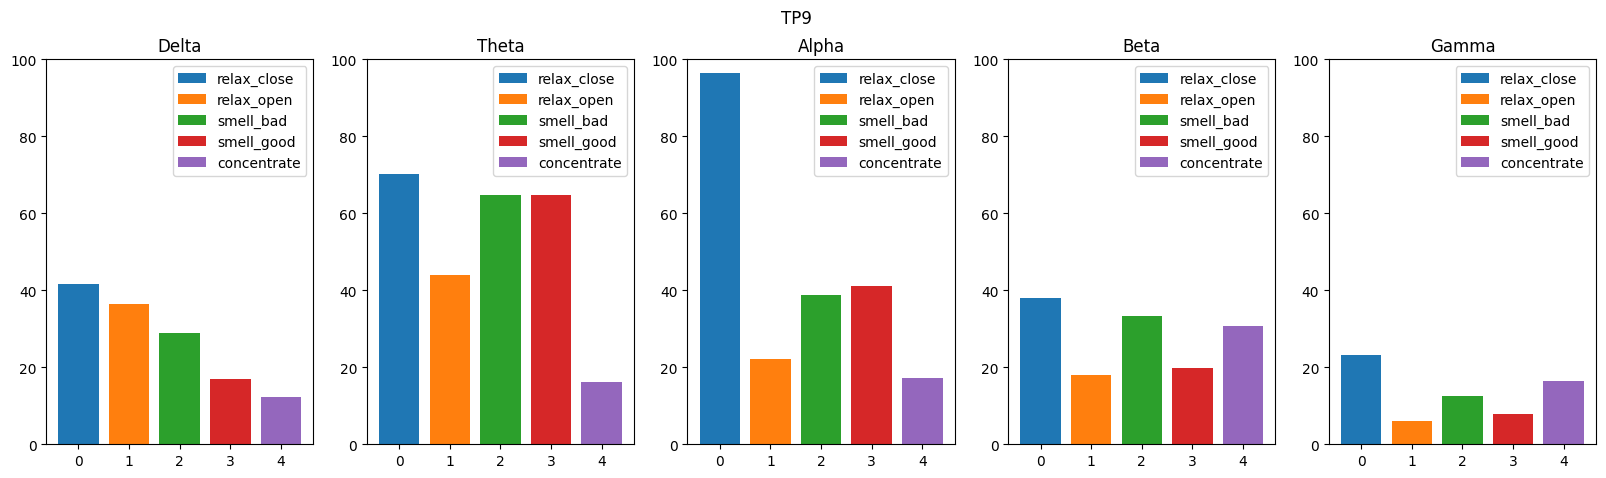

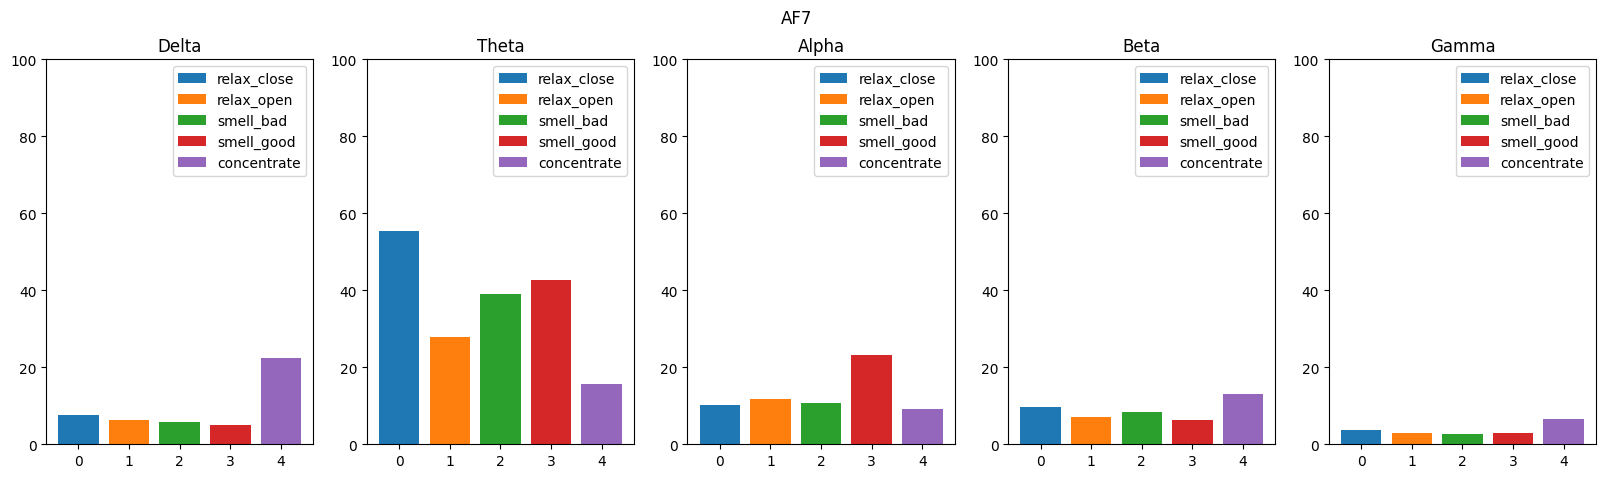

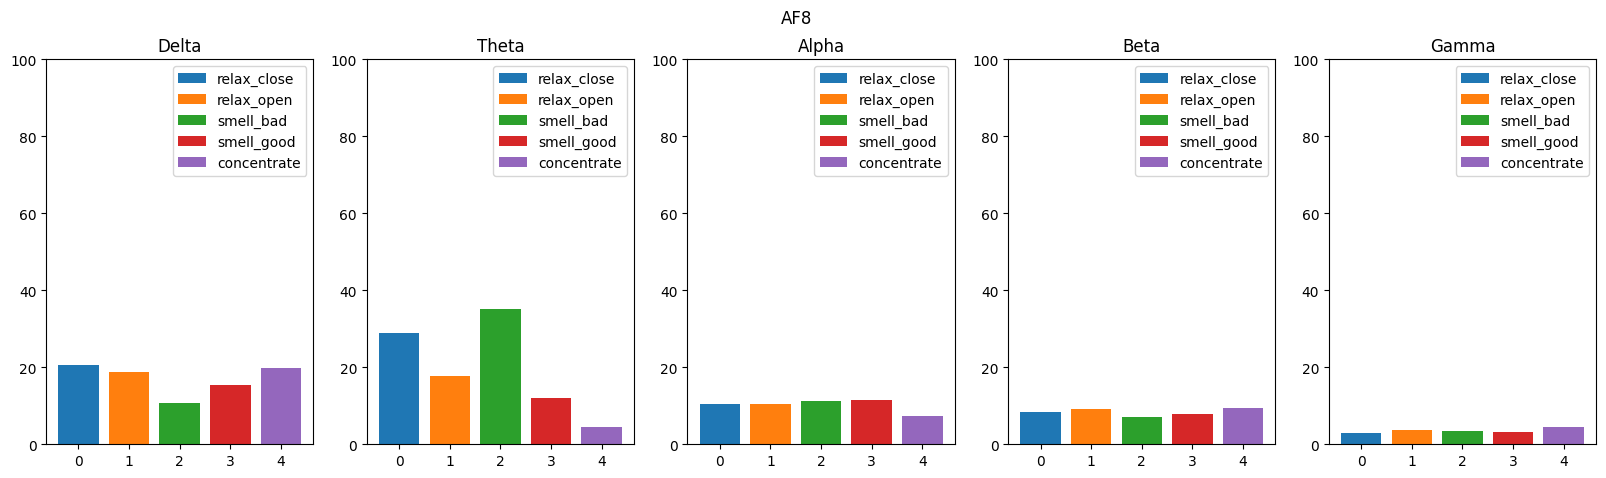

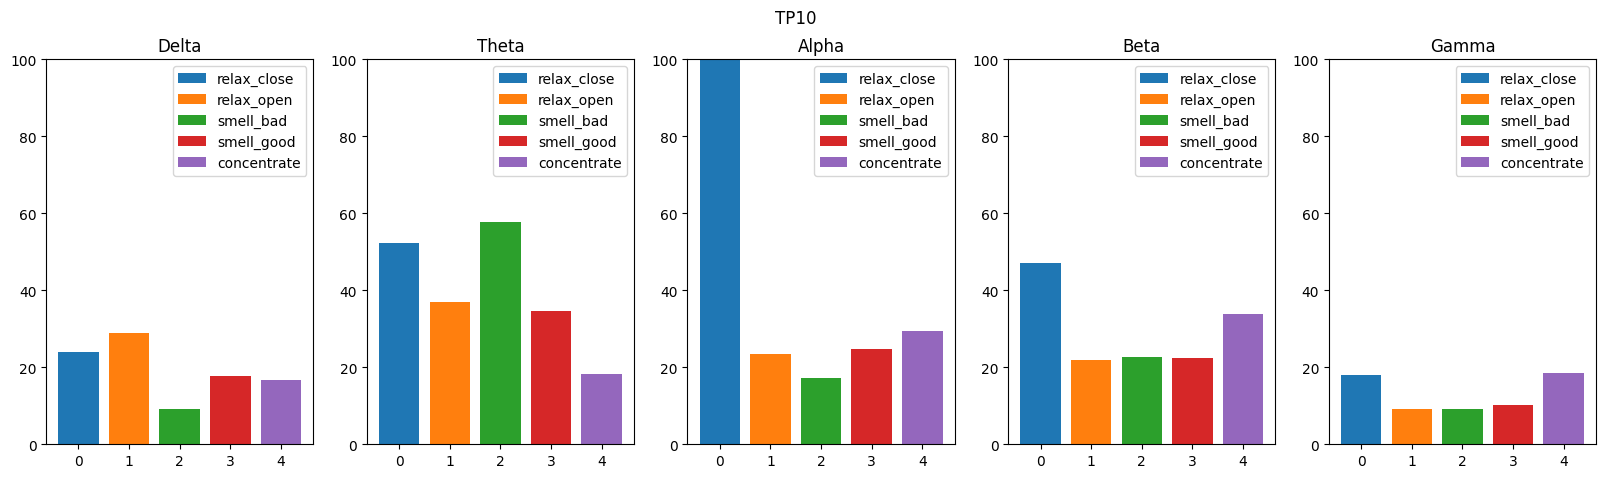

In [9]:
chann_title = ['TP9', 'AF7', 'AF8', 'TP10']
bp_title = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
task_title = list(data.keys())
for channel in range(4):
    plt.figure(figsize=(20, 5))
    plt.suptitle(chann_title[channel])
    for bp in range(5):
        plt.subplot(1, 5, bp+1)
        plt.title(bp_title[bp])
        for i, task in enumerate(task_title):
            plt.bar(i, data[task][channel, bp], label=task)
        plt.ylim(0, 100)
        plt.legend()        
    plt.show()

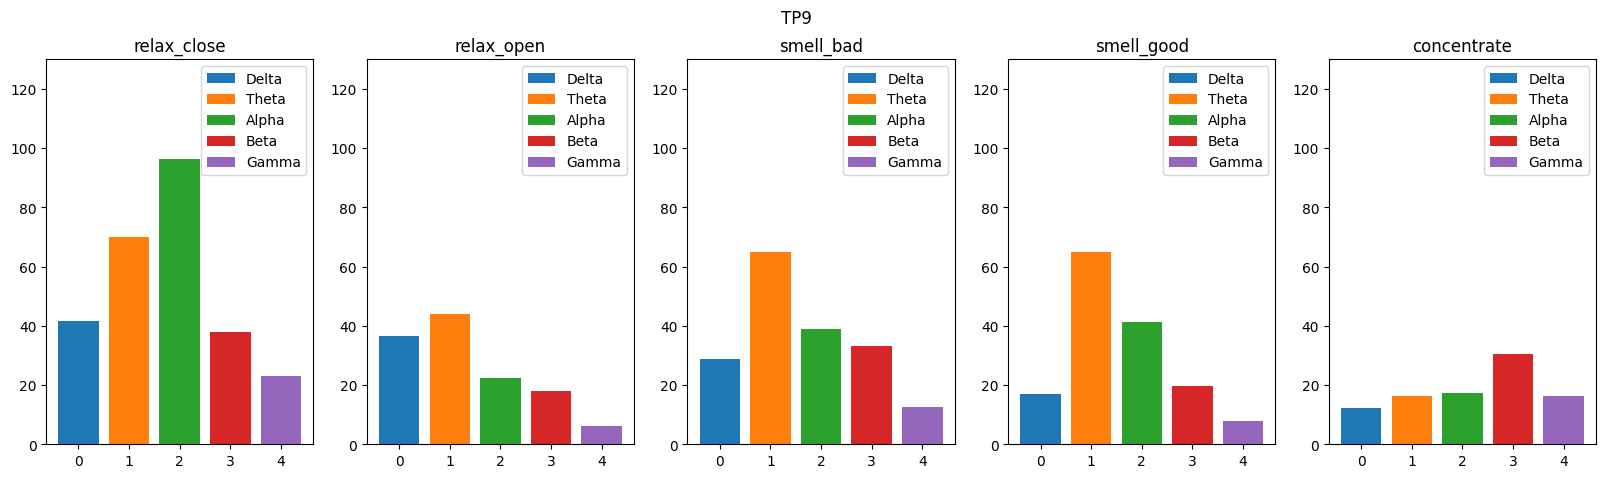

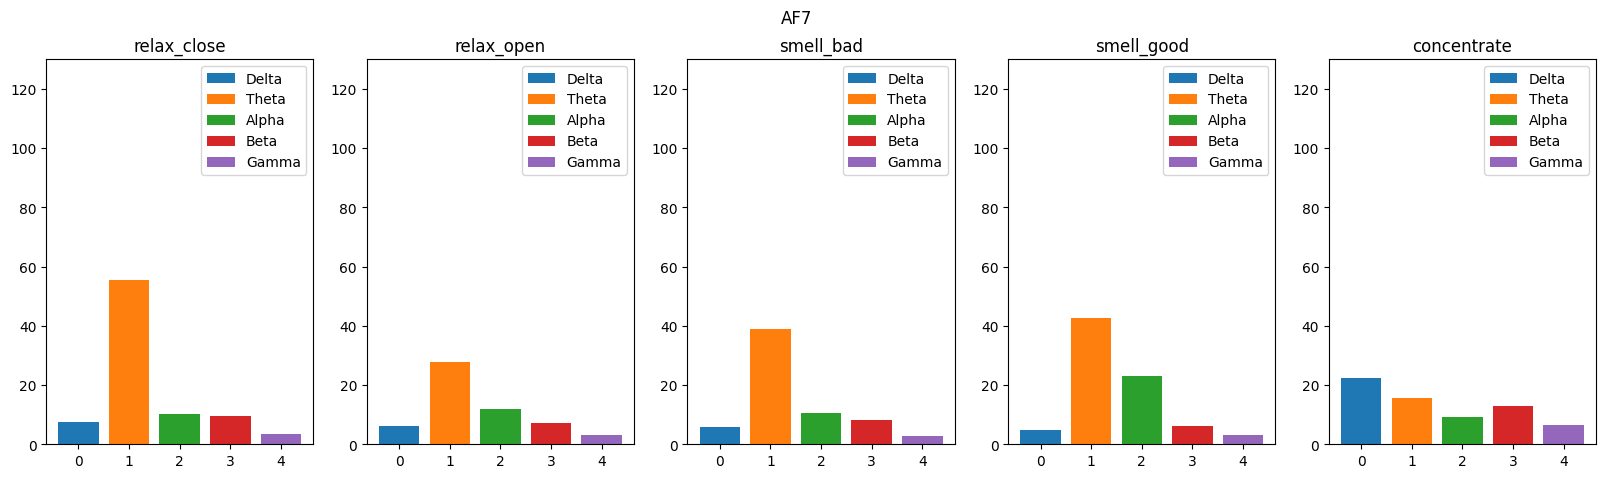

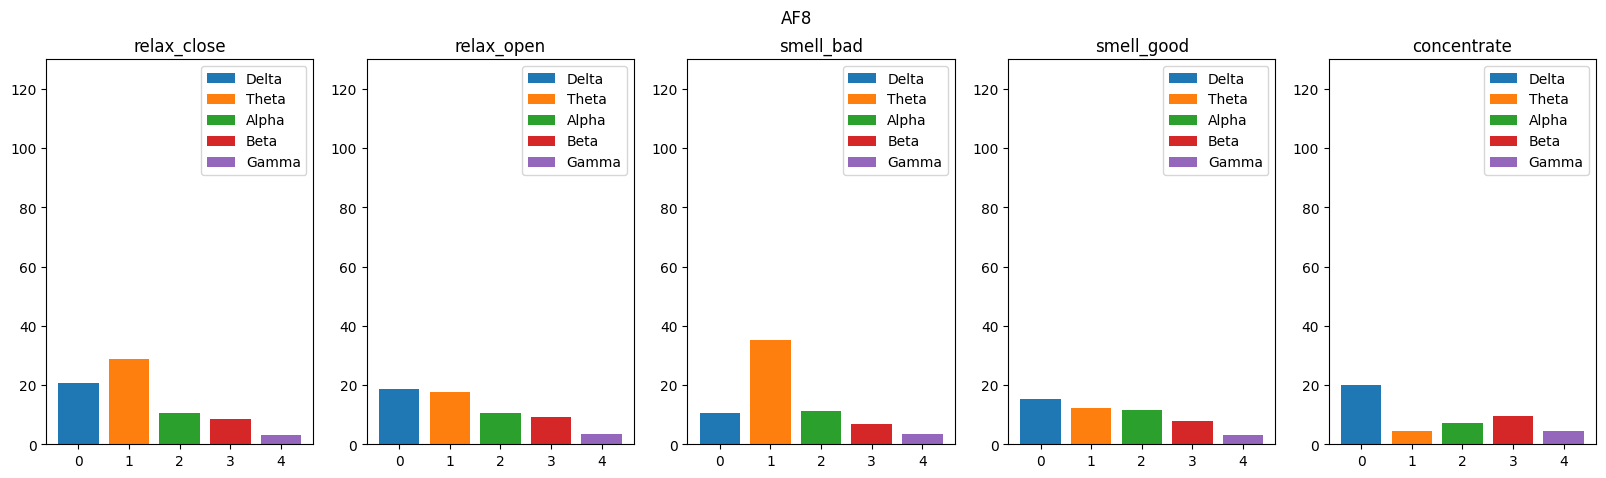

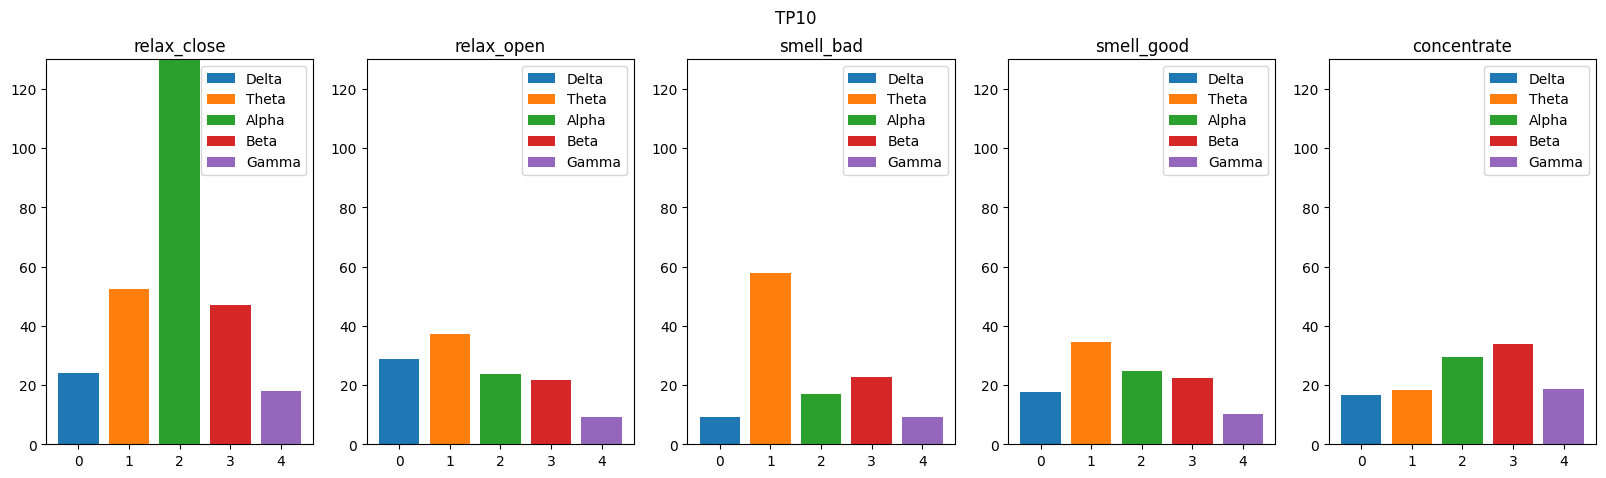

In [10]:
chann_title = ['TP9', 'AF7', 'AF8', 'TP10']
bp_title = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
task_title = list(data.keys())
for channel in range(4):
    plt.figure(figsize=(20, 5))
    plt.suptitle(chann_title[channel])
    for i, task in enumerate(task_title):
        plt.subplot(1, 5, i+1)
        plt.title(task_title[i])
        for bp in range(5):
            plt.bar(bp, data[task][channel, bp], label=bp_title[bp])
        plt.ylim(0, 130)
        plt.legend()        
    plt.show()

In [14]:
def run_violin(file):
    df = pd.read_csv(file, index_col=0)
    df = df.drop(columns=['Right AUX'])
    return df.to_numpy()

In [ ]:
data = {
    'relax_close': run_violin('./data/test_data/relax_close.csv'),
    'relax_open': run_violin('./data/test_data/relax_open.csv'),
    'smell_bad': run_violin('./data/test_data/smell_bad.csv'),
    'smell_good': run_violin('./data/test_data/smell_good.csv'),
    'concentrate': run_violin('./data/test_data/concentrate.csv')
}

/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/2292768700.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


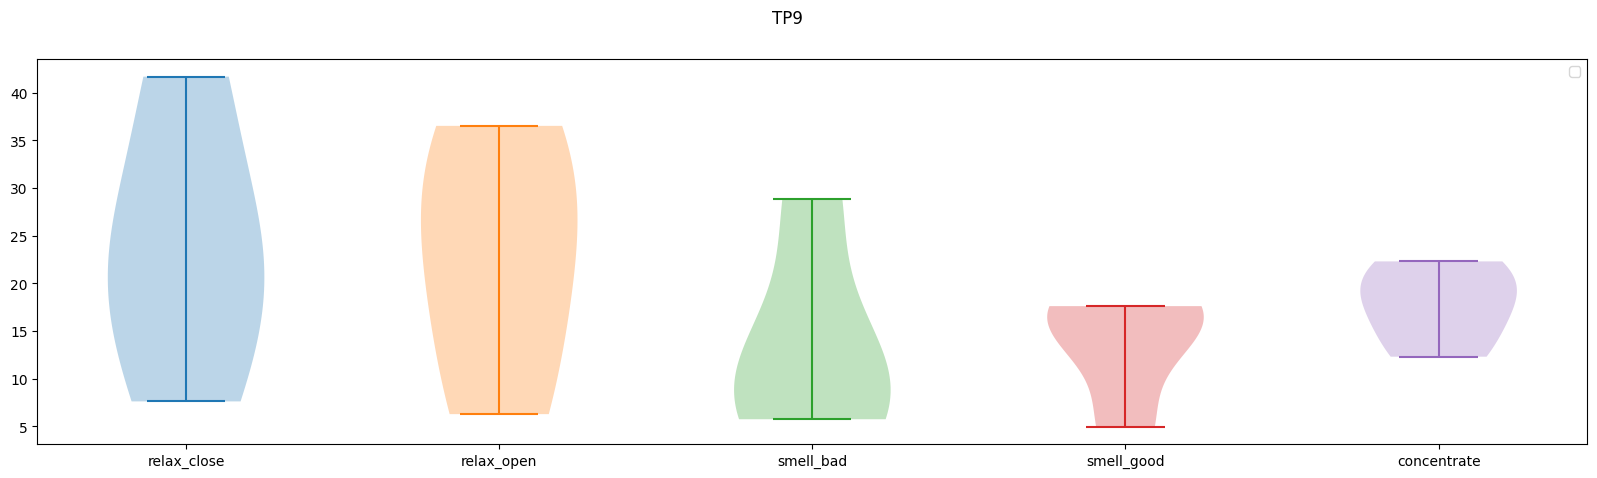

/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/2292768700.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


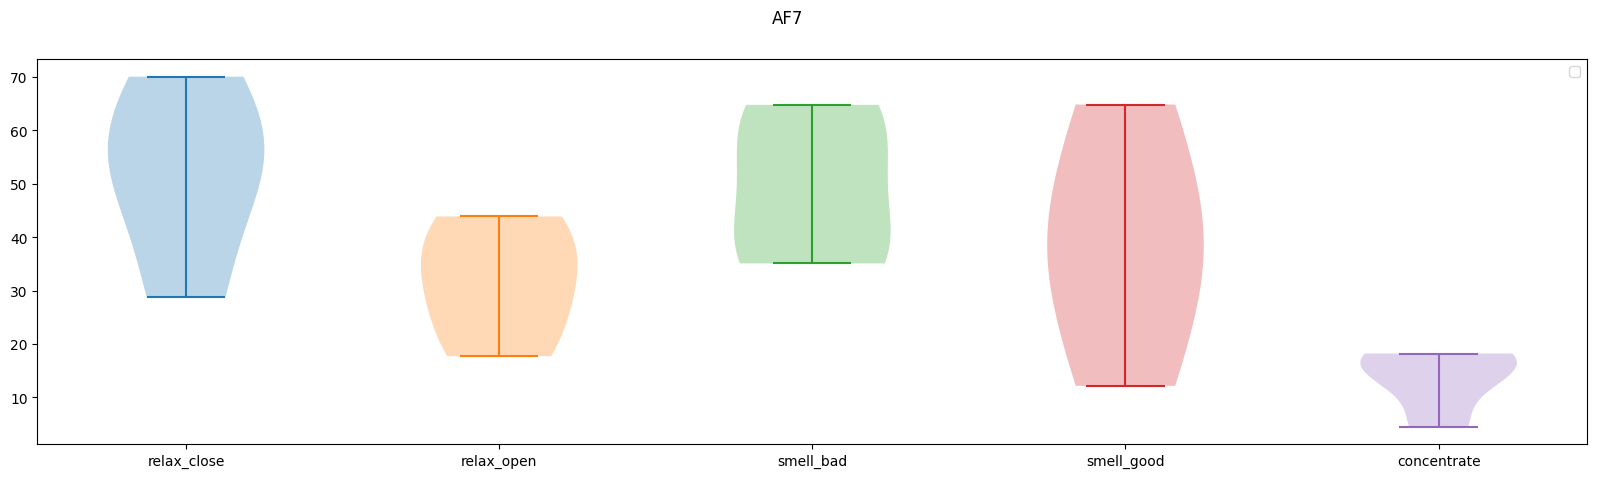

/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/2292768700.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


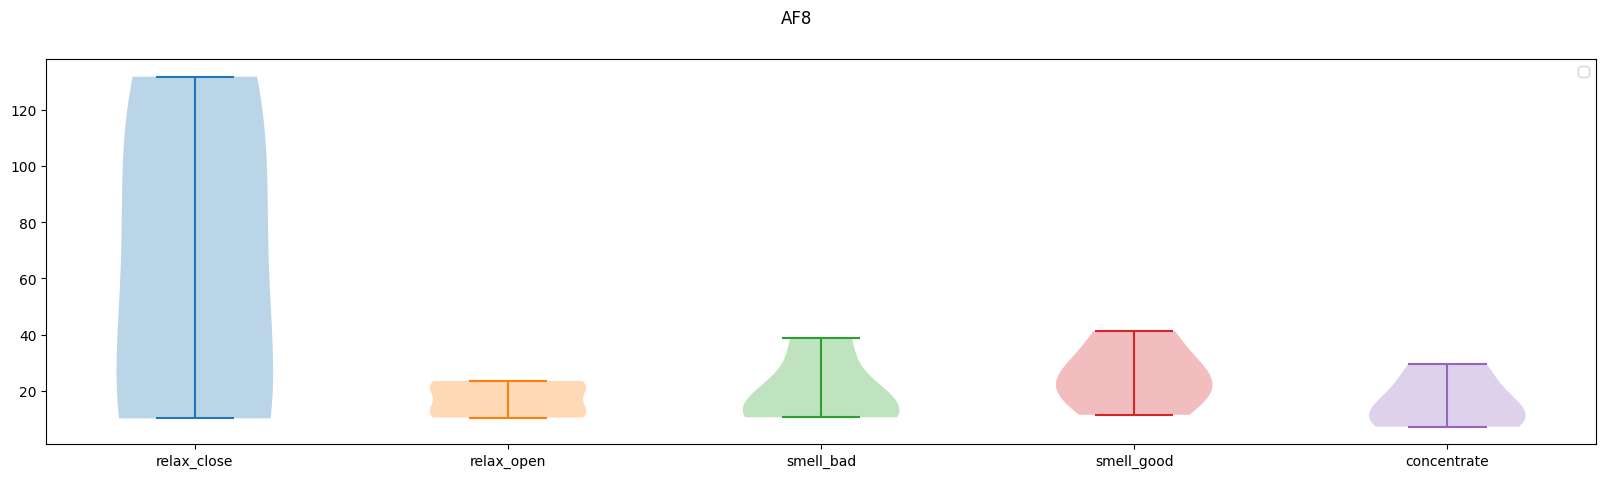

/var/folders/1r/b1j1ng_x6vb20tgx20gvqn400000gn/T/ipykernel_42673/2292768700.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


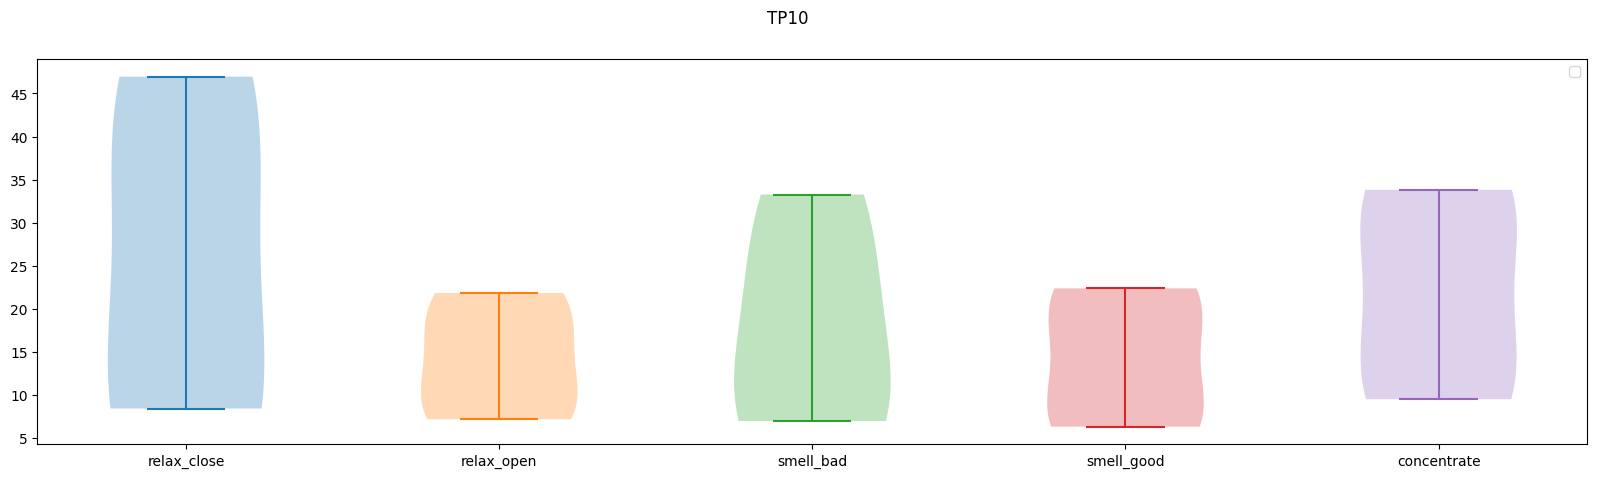

In [37]:
chann_title = ['TP9', 'AF7', 'AF8', 'TP10']
bp_title = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
task_title = list(data.keys())
for channel in range(4):
    plt.figure(figsize=(20, 5))
    plt.suptitle(chann_title[channel])
    # plt.subplot(1, 5, channel+1)
    for i, task in enumerate(task_title):
        plt.violinplot(data[task][:, channel], [i+1])

    plt.xticks([1, 2, 3, 4, 5], task_title)
    
    plt.legend()        
    plt.show()